# Lab 5: pandas
Complete the following 2 problems using your knowledge of `DataFrames`. You will need the `pandas` library and the `matplotlib.pylab` library.

**Rubric**
- 4 points: Completes both problems as described
- 3 points: Completes one of the problems as described
- 2 points: Missing or incomplete


## Problem 1: Population Data 
In this example we will fetch data about countries and their population from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [55]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 


### Investigating DataFrames
Write code in the boxes below to display the following information:


1. The number of records `df_a`

In [56]:
print(len(df_a))

228


2. The last 11 rows of `df_a`

In [57]:
df_a[len(df_a) - 11:]


,countries,1950,1955,1960,1965,1970,1975,1980
217,Uruguay,2195,2354,2531,2694,2824,2844,2931
218,Uzbekistan,6293,7233,8532,10206,11941,13988,15994
219,Vanuatu,53,59,67,75,86,100,117
220,Venezuela,5010,6171,7557,9068,10759,12675,14768
221,Vietnam,25349,27739,31657,37259,42577,48076,53716
222,Wallis and Futuna,7,8,8,9,9,9,11
223,Western Sahara,10,16,28,50,90,73,125
224,Yemen,4778,5266,5872,6511,7099,7935,9133
225,Zambia,2554,2870,3255,3695,4241,4849,5541
226,Zimbabwe,2854,3410,4011,4686,5515,6342,7170


3. A 5 number summary of `df_a`

In [58]:
df_a.describe()

,1950,1955,1960,1965,1970,1975,1980
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2.243589e+04,2.440490e+04,2.669352e+04,2.939022e+04,3.256806e+04,3.586970e+04,3.904757e+04
std,1.750677e+05,1.903733e+05,2.080701e+05,2.290908e+05,2.542257e+05,2.802368e+05,3.049422e+05
min,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
25%,1.130000e+02,1.270000e+02,1.495000e+02,1.800000e+02,2.162500e+02,2.250000e+02,2.550000e+02
50%,1.812500e+03,1.952500e+03,2.155500e+03,2.569500e+03,2.807000e+03,3.013500e+03,3.315000e+03
75%,6.328250e+03,7.083750e+03,7.656500e+03,8.520250e+03,9.321000e+03,1.005725e+04,1.039475e+04
max,2.557629e+06,2.782099e+06,3.043002e+06,3.350426e+06,3.712698e+06,4.089084e+06,4.451363e+06


4. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [59]:
df_a.set_index(keys = ["countries"], inplace=True )
df_a

,1950,1955,1960,1965,1970,1975,1980
countries,,,,,,,
Afghanistan,8151,8892,9830,10998,12431,14133,15045
Albania,1228,1393,1624,1884,2157,2402,2672
Algeria,8893,9842,10910,11964,13932,16141,18807
American Samoa,20,20,21,25,28,30,33
Andorra,7,7,9,14,20,27,34
...,...,...,...,...,...,...,...
Western Sahara,10,16,28,50,90,73,125
Yemen,4778,5266,5872,6511,7099,7935,9133
Zambia,2554,2870,3255,3695,4241,4849,5541


5. What is the largest population listed for 1970?

In [60]:
df_a[1970].max()


3712698

6. What was the country for that entry?

In [61]:
df_a[1970].idxmax()

'World'

7. What was the population of Austria from 1950-1980?

In [62]:
df_a['Austria':'Austria']

,1950,1955,1960,1965,1970,1975,1980
countries,,,,,,,
Austria,6936,6947,7048,7271,7468,7579,7550


8. What was the population of France in 1965?

In [63]:
df_a.loc['France':'France', [1965]]

,1965
countries,
France,49834


9. What was the population in 1980 of the 200th country on the list?

In [64]:
df2 = df_a.reset_index()
df2[200:201]

,countries,1950,1955,1960,1965,1970,1975,1980
200,Tanzania,7935,8971,10260,11871,13807,16148,18654


### Sorting and Joining Tables

10. What 5 entries had the highest population in 1970? Display their records.

In [65]:
df3 = df2
df3.sort_values(by=1970, ascending=False, inplace=True)
df3[['countries', 1970]].head(5)



,countries,1970
227,World,3712698
41,China,822116
90,India,553889
215,United States,203985
165,Russia,130246


Below is code to scrape two more tables off of Wikipedia: World Populations from 1985-2015 and World Populations from 2020-2050. They are stored as the `DataFrames` `df_b` and `df_c` respectively. Use these two `DataFrames ` to answer the remaining questions.

In [66]:
df3 = df_a.drop(index = 'World')
df3.sort_values(by=1970, ascending=False)[1970]




countries
China                                          822116
India                                          553889
United States                                  203985
Russia                                         130246
Indonesia                                      122292
                                                ...  
Turks and Caicos Islands                            6
Saint Helena Ascension and Tristan da Cunha         6
Saint Martin                                        6
Saint Pierre and Miquelon                           6
Saint Barthélemy                                    3
Name: 1970, Length: 227, dtype: int64

In [67]:
for i in range(2):
    tbody = soup.find_all("tbody")
    tr = tbody[i+1].find_all("tr")
    arr = []
    mat = []
    for t in tr:
        lst = t.text.split("\n")
        for l in lst:
            if l == "":
                if arr != []:
                    arr = [arr[0]] + arr[1::2]
                    mat.append(arr)
                    arr = []
            else:
                try: 
                    arr.append(int(l.lstrip('\xa0').replace(",","")))
                except ValueError:
                    arr.append(str(l.lstrip('\xa0').replace(",","")))
    titles = mat[0]
    titles[0] = "countries"
    mat = mat[1:]
    if i == 0: df_b = pd.DataFrame.from_records(mat, columns=titles) 
    else: df_c = pd.DataFrame.from_records(mat, columns=titles) 

df_b.set_index('countries', inplace=True) 
df_c.set_index('countries', inplace=True) 
# where df_a is 1950-1980, df_b is 1985-2015, df_c is 2020-2050

12. What are the dimensions of these two `DataFrames`? 

In [68]:
df_b.info
print('227 rows x 7 columns')
df_c.info
print('228 rows x 7 columns')

227 rows x 7 columns
228 rows x 7 columns


13. Combine all three tables into a `DataFrame ` called `df` that stores a country's population from 1950-2050 and display its first 5 entries.

In [69]:
df = pd.concat([df_a, df_b, df_c],axis=1)
df.loc[['Aruba']]

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
countries,,,,,,,,,,,,,,,,,,,,,
Aruba,50,54,58,60,60,60,60,NaN,NaN,NaN,...,NaN,NaN,NaN,120,127,133,138,143,147,151


14. What was country with the smallest population in 2000?

In [70]:
df[2000]
placeholddf = df
placeholddf.sort_values(by=2000, ascending=True)[2000]


countries
Montserrat                                           4.0
Saint Pierre and Miquelon                            7.0
Saint Barthélemy                                     8.0
Saint Helena Ascension and Tristan da Cunha          8.0
Nauru                                               10.0
                                                 ...    
United States                                   282163.0
India                                          1006301.0
China                                          1268302.0
World                                          6088572.0
Aruba                                                NaN
Name: 2000, Length: 228, dtype: float64

15. What was the mean population in 2005?

In [71]:
df[2005].mean()

57031.33480176212

### Plotting with Matplotlib
We are going to use `matplotlib` to visualize our data. 

Import it below.

In [72]:
import matplotlib.pyplot as plt

Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 1950-2050. Your graph needs to include a  proper title, axis labels, and legend.

Text(0.5, 1.0, 'populations amongst countries')

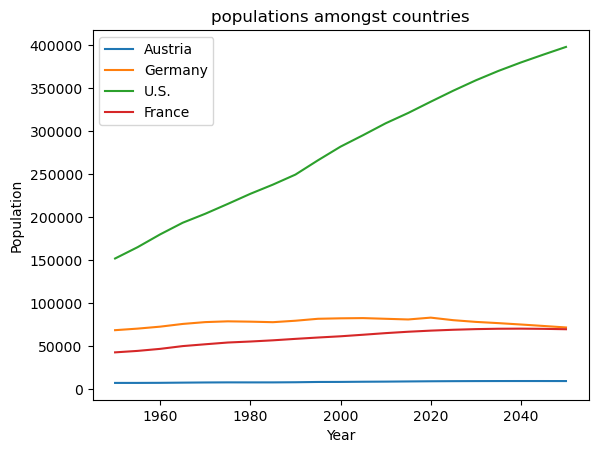

In [73]:
aus = df.loc[['Austria']].mean()
ger = df.loc[['Germany']].mean()
us = df.loc[['United States']].mean()
fran = df.loc[['France']].mean()

plt.plot(aus, label = 'Austria')
plt.plot(ger, label = 'Germany')
plt.plot(us, label = "U.S.")
plt.plot(fran, label = 'France')

plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.title("populations amongst countries")

#### Challenge(Optional): Plot 5 most populous countries from 2010 and 2050
Display a plot of the population from 1950-2050 of the 5 most populous countries from 2010 side-by-side with a plot of the population from 1950-2050 of the 5 most populous countries from 2050

Text(0.5, 1.0, '2050')

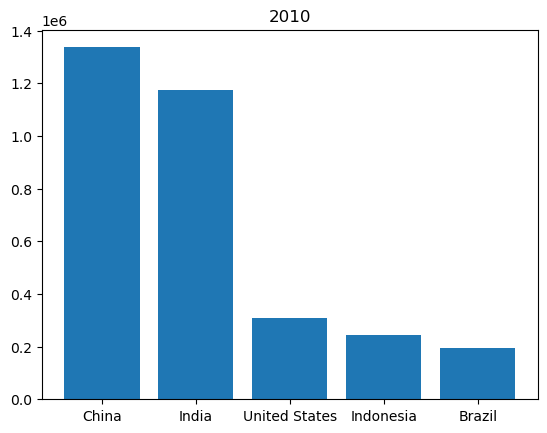

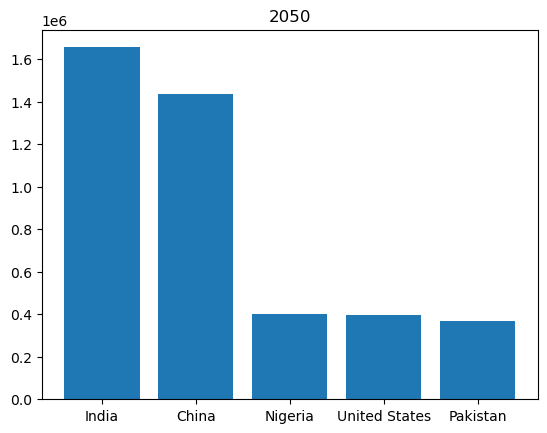

In [74]:
df2 = df.drop(index = 'World')

df_2010 = df2.sort_values(by=2010, ascending=False)[2010]
graph2010, g10 = plt.subplots()
g10.bar(df_2010[:5].index, df_2010[:5])
g10.set_title('2010')

df_2050 = df2.sort_values(by=2050, ascending=False)[2050]
graph2050, g50 = plt.subplots()
g50.bar(df_2050[:5].index, df_2050[:5])
g50.set_title('2050')

## Problem 2: Rotten Tomatoes Database

We are going to use a dataset of Rotten Tomatoes scores. I have imported it for you, as the `DataFrame` called `movies`.

In [75]:
# Get this one from the internet but also use the IMDB one
from io import StringIO
movie_txt = requests.get('https://raw.github.com/cs109/cs109_data/master/movies.dat').text
movie_file = StringIO(movie_txt) # treat a string like a file
movies = pd.read_csv(movie_file, delimiter='\t')
movies

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,65037,Ben X,953318,Ben X,http://ia.media-imdb.com/images/M/MV5BMTkxMDMy...,2007,10009212-ben_x,6.3,36,24,...,66,6.1,7,4,3,57,3.9,2886,82,http://content9.flixster.com/movie/10/86/82/10...
9419,65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104,26,...,25,4.7,26,6,20,23,3.5,108877,63,http://content6.flixster.com/movie/10/94/33/10...
9420,65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7,12,10,...,83,0,4,2,2,50,3.7,344,71,http://content9.flixster.com/movie/66/44/64/66...
9421,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135,73,...,54,4.9,26,8,18,30,3.3,13893,55,http://content6.flixster.com/movie/10/85/09/10...


1. What do each of the columns of this `DataFrame` mean? Fill in the following box with a short description of each of the columns. Be specific!

If you need some help [look at the README](https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-readme.txt) for the dataset.

- id: the id of the movie on the site
- title: title of the movie
- imdbid: id of the movie on imdb
- spanishtitle: the title in spanish
- imdbpictureurl: url of the picture on imdb
- year: year it was released
- rtID: rotten tomatoes id
- rtAllCriticsRatings: rotten tomatoes critics rating
- rtAllCriticsNumReviews: numeric reviews from rotten tomatoes critics
- rtAllCriticsNumFresh: indicates if at least 60% of reviews are positive as a number
- im skipping some of these...
- rtPictureURL: url for the movies picture on rotten tomatoes

2. Set the column `id` as the index for the dataset.

In [76]:
movies.set_index(keys = ['id'], inplace = True)
movies

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,15,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,12,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,11,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,10,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65037,Ben X,953318,Ben X,http://ia.media-imdb.com/images/M/MV5BMTkxMDMy...,2007,10009212-ben_x,6.3,36,24,12,66,6.1,7,4,3,57,3.9,2886,82,http://content9.flixster.com/movie/10/86/82/10...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104,26,78,25,4.7,26,6,20,23,3.5,108877,63,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7,12,10,2,83,0,4,2,2,50,3.7,344,71,http://content9.flixster.com/movie/66/44/64/66...


3. We want to make a plot of the top 10 highest rated movies on Rotten Tomatoes by Audience Score. Sort the table by `rtAudienceScore` and make a plot of the top 10 movies. What happens?


*Matplotlib tip: use `plt.bar(df['x_col'], df['y_col'],...)` then use other matplotlib methods to add important features to the graph*

<BarContainer object of 9203 artists>

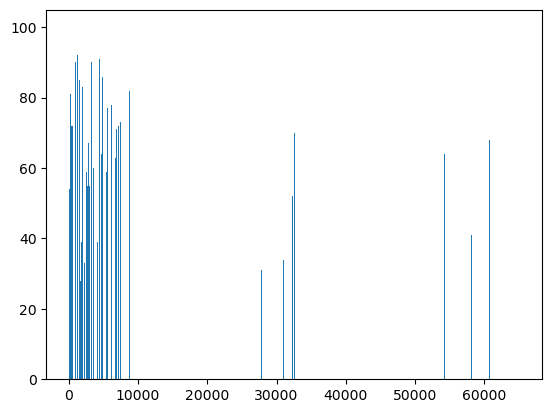

In [77]:

movies_audrtscore = movies.sort_values(by = 'rtAudienceScore', ascending = False)
movies_audrtscore = pd.to_numeric(movies_audrtscore['rtAudienceScore'], errors='coerce')

movies_audrtscore = movies_audrtscore.dropna()
movies_audrtscore[:10]

plt.bar(movies_audrtscore.index, movies_audrtscore.values)

4. What has happened to our plot? How can we remove our empty values? Remove those values and try it again?

<BarContainer object of 9203 artists>

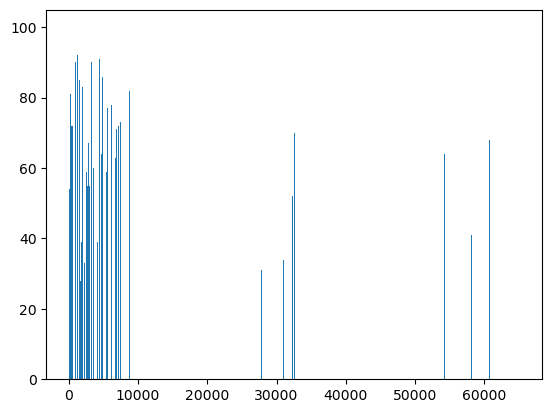

In [78]:
movies_audrtscore = movies.sort_values(by = 'rtAudienceScore', ascending = False)
movies_audrtscore = pd.to_numeric(movies_audrtscore['rtAudienceScore'], errors='coerce').dropna()
movies_audrtscore = movies_audrtscore.dropna()

movies_audrtscore[:10]
plt.bar(movies_audrtscore.index, movies_audrtscore.values)

5. Does this plot look right? What other rows might we want to exclude or columns we might want to sort by, so our top 10 list looks more similar to other lists.

In [79]:

movies_audrtscore = movies.sort_values(by = 'rtAudienceScore', ascending = False)
movies_audrtscore['rtAudienceScore'] = pd.to_numeric(movies_audrtscore['rtAudienceScore'], errors='coerce')
movies_audrtscore = movies_audrtscore.dropna()

movies_audrtscore[['title', 'rtAudienceScore']].head(10)

,title,rtAudienceScore
id,,
7620,Monster in a Box,98.0
318,The Shawshank Redemption,98.0
7767,La meglio gioventù,97.0
6016,Cidade de Deus,97.0
47,Shichinin no samurai,97.0
858,The Godfather,97.0
58559,The Dark Knight,96.0
2329,American History X,96.0
1213,Goodfellas,96.0


6. We want to know what years the most popular movies were made in. In the box below, rewrite our question/statement as something that is is specific and answerable using our dataset. There is no one "correct" answer here. 

New question: what year has the lowest rt audience score

7. Create a plot that answers your new question.

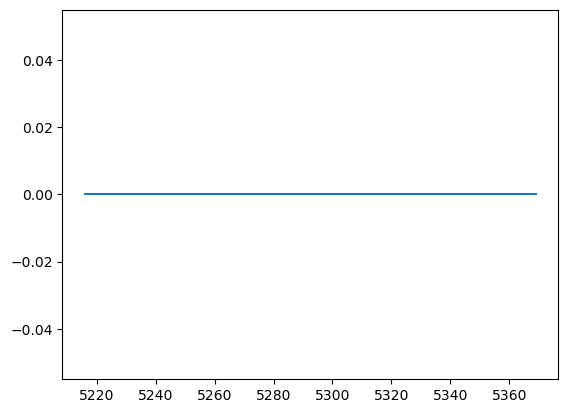

In [80]:
movies_audrtscore = movies
movies_audrtscore['rtAudienceScore'] = pd.to_numeric(movies_audrtscore['rtAudienceScore'], errors='coerce')
movies_audrtscore = movies_audrtscore.dropna()
movies_audrtscore = movies.sort_values(by = 'rtAudienceScore', ascending = True)

movies_audrtscore[['year', 'title', 'rtAudienceScore']][:10]
plt.plot(movies_audrtscore[['rtAudienceScore']][:10])

8. What if we want to balance audience and critics scores? Create a new column called `rtWeightedRating` to store a movies' overall weighted average score of 70% Top Critics Rating and 30% Audience Rating.  

In [90]:
movies['rtAudienceRating'] = pd.to_numeric(movies['rtAudienceRating'], errors='coerce')
movies['rtTopCriticsRating'] = pd.to_numeric(movies['rtTopCriticsRating'], errors='coerce')
movies = movies.dropna(subset = ['rtAudienceRating'])
movies['rtWeightedScores'] = (movies['rtTopCriticsRating'] * 0.7) + (movies['rtAudienceRating'] * 0.3)
movies['rtWeightedScores'].head(100)

/tmp/ipykernel_414376/2487349925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rtAudienceRating'] = pd.to_numeric(movies['rtAudienceRating'], errors='coerce')
/tmp/ipykernel_414376/2487349925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rtTopCriticsRating'] = pd.to_numeric(movies['rtTopCriticsRating'], errors='coerce')


id
1      7.06
2      5.02
3      5.86
4      4.84
5      4.68
       ... 
99     7.06
100    5.80
101    5.38
102    2.89
103    0.90
Name: rtWeightedScores, Length: 100, dtype: float64

9. Create a histogram to show the number of movies with each weighted score. Your "buckets" should be from 0-10 and go up by 0.5. 

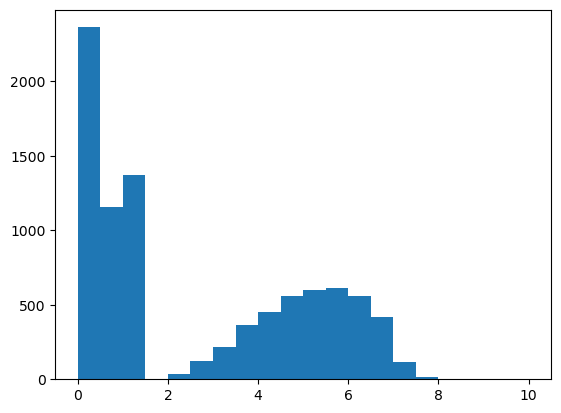

In [92]:
movies.describe()
plt.hist(movies['rtWeightedScores'], bins = np.arange(0, 10.5, 0.5))
plt.show()


10. What are the top 10 movies based on our new list?

In [83]:
moviesb = movies.sort_values(by = 'rtWeightedScores', ascending = False)
moviesb[['title', "rtWeightedScores"]].head(10)


,title,rtWeightedScores
id,,
8128,Au revoir les enfants,8.26
1913,Picnic at Hanging Rock,7.99
3260,Howards End,7.97
670,Apur Sansar,7.76
215,Before Sunrise,7.74
1111,Microcosmos: Le peuple de l'herbe,7.71
1041,Secrets & Lies,7.67
1094,The Crying Game,7.63
509,The Piano,7.62
